# 1. Importar Librerías

In [1]:
import joblib
import keras_tuner as kt

import tensorflow as tf
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

# 2. Importar Datos

In [7]:
x_train = joblib.load('salidas\\x_train.pkl')
y_train = joblib.load('salidas\\y_train.pkl')
x_test = joblib.load('salidas\\x_test.pkl')
y_test = joblib.load('salidas\\y_test.pkl')

In [8]:
x_train.max()

1.0

# 3. Modelos

## 3.1. Modelo Random Forest Classifier

In [4]:
x_train2=x_train.reshape(6953,30000)
x_test2=x_test.reshape(1737, 30000)
x_train2.shape
x_test2.shape

(1737, 30000)

In [5]:
rf=RandomForestClassifier()
rf.fit(x_train2, y_train)

c:\aplicaciones_analitica\Casos de Estudio\brain-tumor-detection\environment\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


KeyboardInterrupt: 

In [6]:
print('------------------------TRAIN---------------------------')
pred_train = rf.predict_proba(x_train2)[:, 1]
pred_train = (pred_train > 0.98).astype(int)
print(metrics.classification_report(y_train, pred_train))
metrics.roc_auc_score(y_train, pred_train)

print()
print('------------------------TEST---------------------------')
pred_test = rf.predict_proba(x_test2)[:, 1]
pred_test = (pred_test > 0.98).astype(int)
print(metrics.classification_report(y_test, pred_test))
metrics.roc_auc_score(y_test, pred_test)

------------------------TRAIN---------------------------
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      2864
           1       1.00      0.78      0.87      4089

    accuracy                           0.87      6953
   macro avg       0.88      0.89      0.87      6953
weighted avg       0.90      0.87      0.87      6953


------------------------TEST---------------------------
              precision    recall  f1-score   support

           0       0.63      1.00      0.78       716
           1       1.00      0.59      0.74      1021

    accuracy                           0.76      1737
   macro avg       0.82      0.80      0.76      1737
weighted avg       0.85      0.76      0.76      1737



0.796767874632713

## 3.2. Red Neuronal Estándar

In [7]:
fc_model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=x_train.shape[1:]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\aplicaciones_analitica\Casos de Estudio\brain-tumor-detection\environment\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
##### configura el optimizador y la función para optimizar ##############
fc_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','AUC', 'Recall', 'Precision'])

In [9]:
#####Entrenar el modelo usando el optimizador y arquitectura definidas #########
fc_model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - AUC: 0.6745 - Precision: 0.6897 - Recall: 0.6204 - accuracy: 0.6264 - loss: 1.0592 - val_AUC: 0.9352 - val_Precision: 0.8635 - val_Recall: 0.9667 - val_accuracy: 0.8906 - val_loss: 0.3355
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - AUC: 0.9413 - Precision: 0.9001 - Recall: 0.9135 - accuracy: 0.8918 - loss: 0.3259 - val_AUC: 0.9651 - val_Precision: 0.9447 - val_Recall: 0.9363 - val_accuracy: 0.9303 - val_loss: 0.2291
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - AUC: 0.9681 - Precision: 0.9433 - Recall: 0.9560 - accuracy: 0.9404 - loss: 0.2228 - val_AUC: 0.9672 - val_Precision: 0.8608 - val_Recall: 0.9873 - val_accuracy: 0.8987 - val_loss: 0.2725
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - AUC: 0.9692 - Precision: 0.9309 - Recall: 0.9452 - accuracy: 0.9267 - loss: 0.2182 - val_AUC: 0.9807 - val_Precision: 0.9681 - val_Recall: 0.9520 - val_accuracy: 0.9534 - val_loss: 0.1647
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━

In [10]:
test_loss, test_acc, test_auc, test_recall, test_precision = fc_model.evaluate(x_test, y_test, verbose=2)
print("Test auc:", test_auc)

55/55 - 0s - 8ms/step - AUC: 0.9908 - Precision: 0.9775 - Recall: 0.9804 - accuracy: 0.9752 - loss: 0.1056
Test auc: 0.9908287525177002


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
              precision    recall  f1-score   support

           0       0.70      0.99      0.82       716
           1       0.99      0.71      0.83      1021

    accuracy                           0.83      1737
   macro avg       0.85      0.85      0.83      1737
weighted avg       0.87      0.83      0.83      1737



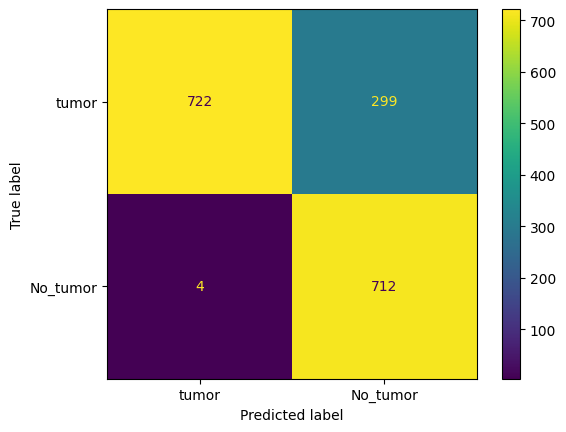

In [11]:
###### matriz de confusión test
pred_test=(fc_model.predict(x_test) > 0.98).astype('int')
cm=metrics.confusion_matrix(y_test,pred_test, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['tumor', 'No_tumor'])
disp.plot()

print(metrics.classification_report(y_test, pred_test))


In [12]:
import plotly.express as px
p = fc_model.predict(x_test)
hist= px.histogram(p)
hist.show()

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


## 3.3. Red Neuronal Convolucional

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\aplicaciones_analitica\Casos de Estudio\brain-tumor-detection\environment\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [14]:
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])

In [15]:
# Train the model for 10 epochs
model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 17s 187ms/step - AUC: 0.8318 - loss: 0.5369 - val_AUC: 0.9846 - val_loss: 0.1747
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 213ms/step - AUC: 0.9827 - loss: 0.1690 - val_AUC: 0.9873 - val_loss: 0.1524
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 219ms/step - AUC: 0.9888 - loss: 0.1381 - val_AUC: 0.9916 - val_loss: 0.1262
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 206ms/step - AUC: 0.9905 - loss: 0.1150 - val_AUC: 0.9921 - val_loss: 0.0928
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 180ms/step - AUC: 0.9969 - loss: 0.0604 - val_AUC: 0.9938 - val_loss: 0.0726
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - AUC: 0.9968 - loss: 0.0624 - val_AUC: 0.9930 - val_loss: 0.0872
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 172ms/step - AUC: 0.9991 - loss: 0.0371 - val_AUC: 0.9939 - val_loss: 0.0664
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 16s 228ms/step - AUC: 0.9996 - loss: 0.0244 - val_AUC: 0.9920 - val_loss: 0.0778
Epoch 9/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 188ms/

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       716
           1       0.99      0.96      0.97      1021

    accuracy                           0.97      1737
   macro avg       0.97      0.97      0.97      1737
weighted avg       0.97      0.97      0.97      1737



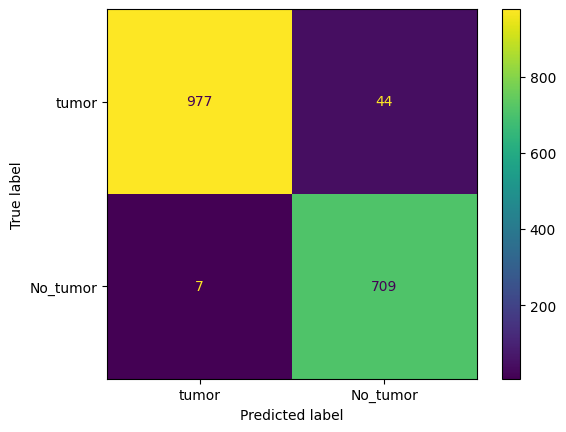

In [16]:
pred_test1=(model.predict(x_test) >= 0.98).astype('int')
cm=metrics.confusion_matrix(y_test,pred_test1, labels=[1,0])
disp=metrics.ConfusionMatrixDisplay(cm,display_labels=['tumor', 'No_tumor'])
disp.plot()

print(metrics.classification_report(y_test, pred_test1))


In [17]:
p = model.predict(x_test)
hist= px.histogram(p)
hist.show()

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


# 3.4. Afinamiento de hiperparametros

In [20]:
reg_strength = 0.001

In [21]:
dropout_rate = 0.1  

In [22]:

hp = kt.HyperParameters()

def build_model(hp):
    dropout_rate=hp.Float('DO', min_value=0.05, max_value= 0.2, step=0.05)
    reg_strength = hp.Float("rs", min_value=0.0001, max_value=0.0005, step=0.0001)
    optimizer = hp.Choice('optimizer', ['adam', 'sgd']) # en el contexto no se debería afinar

    model1 =  tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
    
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=0.001)
    else:
        opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
   
    model1.compile(
        optimizer=opt, loss="binary_crossentropy", metrics=["Recall", "AUC"],
    )
    return model1

In [23]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    hyperparameters=hp,
    tune_new_entries=True, 
    objective=kt.Objective("AUC", direction="max"),
    max_trials=5,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld", 
)

c:\aplicaciones_analitica\Casos de Estudio\brain-tumor-detection\environment\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [24]:
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=100)

fc_best_model = tuner.get_best_models(num_models=1)[0]

Trial 5 Complete [00h 01m 59s]
AUC: 0.9283779859542847

Best AUC So Far: 0.9999985694885254
Total elapsed time: 00h 10m 59s


c:\aplicaciones_analitica\Casos de Estudio\brain-tumor-detection\environment\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning:

Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 



In [25]:
tuner.results_summary()

Results summary
Results in my_dir\helloworld
Showing 10 best trials
Objective(name="AUC", direction="max")

Trial 2 summary
Hyperparameters:
DO: 0.1
rs: 0.0001
optimizer: adam
Score: 0.9999985694885254

Trial 1 summary
Hyperparameters:
DO: 0.2
rs: 0.0001
optimizer: adam
Score: 0.9999967217445374

Trial 4 summary
Hyperparameters:
DO: 0.2
rs: 0.0001
optimizer: sgd
Score: 0.9283779859542847

Trial 0 summary
Hyperparameters:
DO: 0.2
rs: 0.0005
optimizer: sgd
Score: 0.9192618131637573

Trial 3 summary
Hyperparameters:
DO: 0.1
rs: 0.0002
optimizer: sgd
Score: 0.8990659713745117


In [26]:
fc_best_model.save("salidas\\best_model.h5")